In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("Gaublomme_GSE75109_TPM_clean.csv", index_col="gene_id")

In [4]:
fm_thresholds = pd.read_csv("Gaublomme_GSE75109_TPM_clean/intermediate/3max/optimal_thresholds.csv", index_col="gene_id")
gtme_thresholds = pd.read_csv("Gaublomme_GSE75109_TPM_clean/intermediate/geomean/optimal_thresholds.csv", index_col="gene_id")
vrs_thresholds = pd.read_csv("Gaublomme_GSE75109_TPM_clean/intermediate/vrs/optimal_thresholds.csv", index_col="gene_id")

In [5]:
trbv = df.loc[df.index.str.startswith("Trbv")]

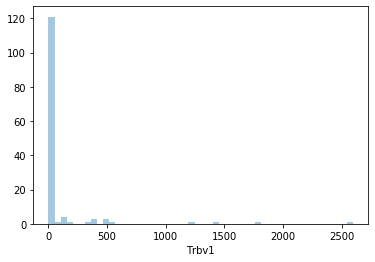

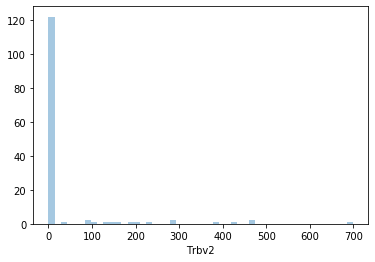

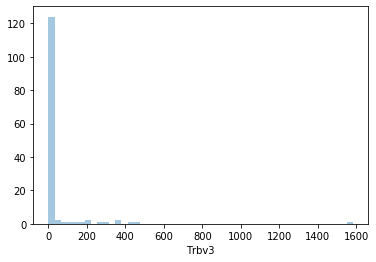

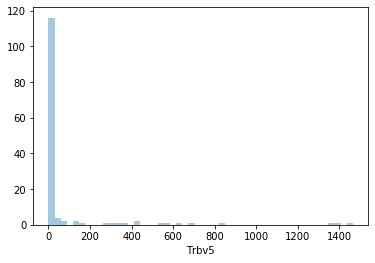

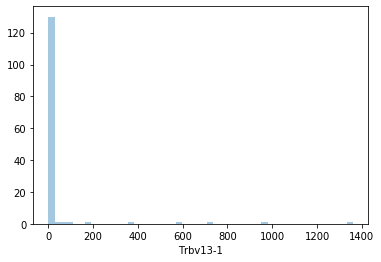

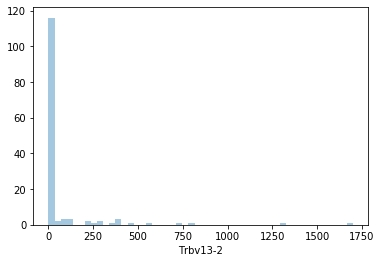

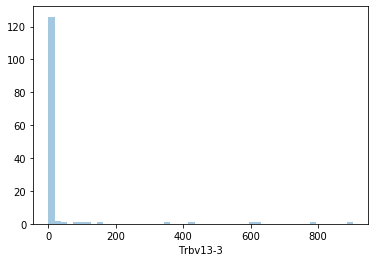

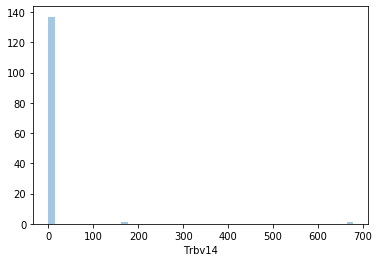

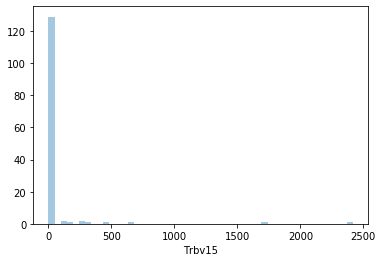

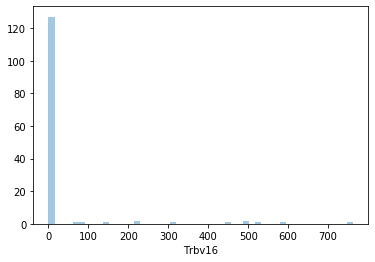

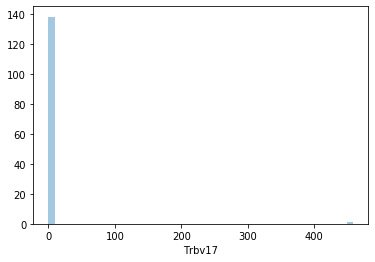

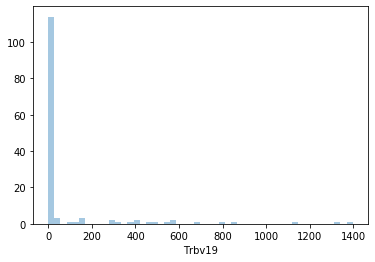

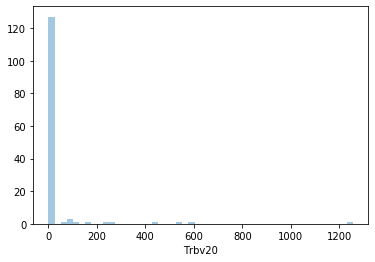

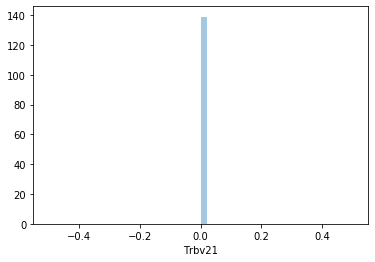

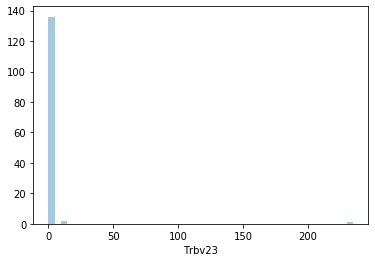

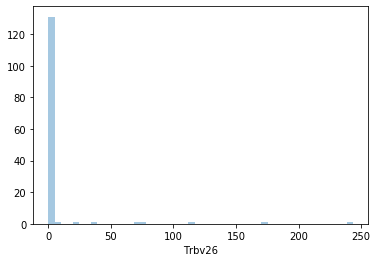

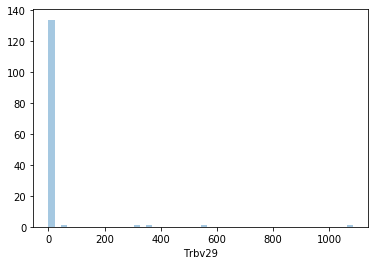

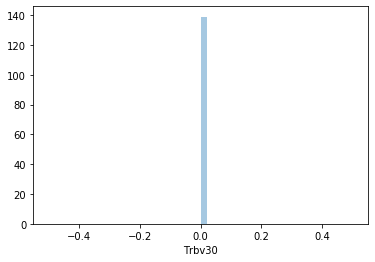

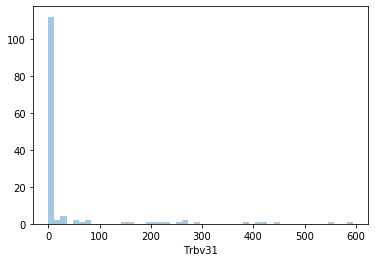

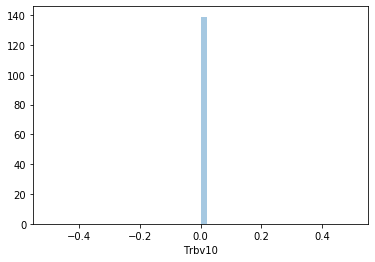

In [6]:
for i, row in trbv.iterrows():
    sns.distplot(row, kde=False,bins=50)
    plt.show()

In [7]:
vrs_thresholds.loc["Trbv26"]

value                     0.186499
threshold                81.105310
uncorrected_threshold    81.105310
Name: Trbv26, dtype: float64

(array([131,   1,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([  0.        ,   4.86680626,   9.73361253,  14.60041879,
         19.46722506,  24.33403132,  29.20083759,  34.06764385,
         38.93445012,  43.80125638,  48.66806265,  53.53486891,
         58.40167518,  63.26848144,  68.13528771,  73.00209397,
         77.86890023,  82.7357065 ,  87.60251276,  92.46931903,
         97.33612529, 102.20293156, 107.06973782, 111.93654409,
        116.80335035, 121.67015662, 126.53696288, 131.40376915,
        136.27057541, 141.13738167, 146.00418794, 150.8709942 ,
        155.73780047, 160.60460673, 165.471413  , 170.33821926,
        175.20502553, 180.07183179, 184.93863806, 189.80544432,
        194.67225059, 199.53905685, 204.40586312, 209.27266938,
        214.

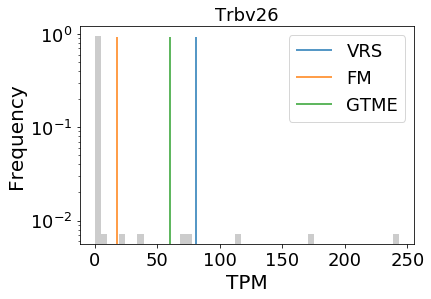

BI 0.8814134347274678


In [9]:
def BI_kurtosis(x):
    n= len(x)
    K = x.kurt()
    skewness = x.skew()
    return (skewness ** 2 + 1) / (K + (3 * (n-1) ** 2) / ((n-2) * (n-3)))

def get_norm(arr):
    return {
        "weights": np.ones(len(arr)) / len(arr)
    }

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# sns.set_context()
gene_id = "Trbv26"
gene = trbv.loc[gene_id]
rug_kws = {"height": 0.95, "linewidth": 1.5}
display(np.histogram(gene, bins=50))
sns.distplot(gene, hist_kws=get_norm(gene), kde=False,bins=50, rug=False, color="grey")
sns.distplot([vrs_thresholds.loc[gene_id].threshold], kde=False, hist=False, rug=True, rug_kws=rug_kws, label="VRS")
sns.distplot([fm_thresholds.loc[gene_id].threshold], kde=False, hist=False, rug=True, rug_kws=rug_kws, label="FM")
sns.distplot([gtme_thresholds.loc[gene_id].threshold], kde=False, hist=False, rug=True, rug_kws=rug_kws, label="GTME")

plt.legend()
plt.xlabel("TPM")
plt.yscale("log",basey=10)
plt.ylabel("Frequency")
plt.title(gene_id)
# plt.ylim([0,140])
plt.show()
print("BI",BI_kurtosis(gene))